In [ ]:
## OpenSoundscape RIBBIT tutorial
# http://opensoundscape.org/en/latest/tutorials/RIBBIT_pulse_rate_demo.html

In [ ]:
## Setup 

In [176]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import subprocess

#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.precision', 2)

In [4]:
## Load audio clip from file 

In [103]:
audio_path = np.sort(glob('./test_gopher_audio/*'))[0]

#load the audio file into an OpenSoundscape Audio object
audio = Audio.from_file(audio_path)

#trim the audio to cut out person
audio = audio.trim(53,55)

#create a Spectrogram object
spectrogram = Spectrogram.from_audio(audio) #, window_samples = 300

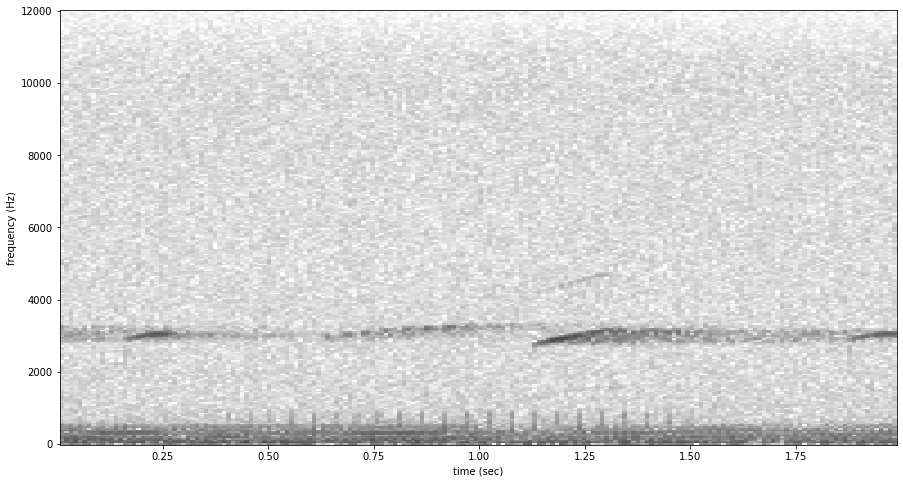

In [104]:
# view spectrogram 
spectrogram.plot()


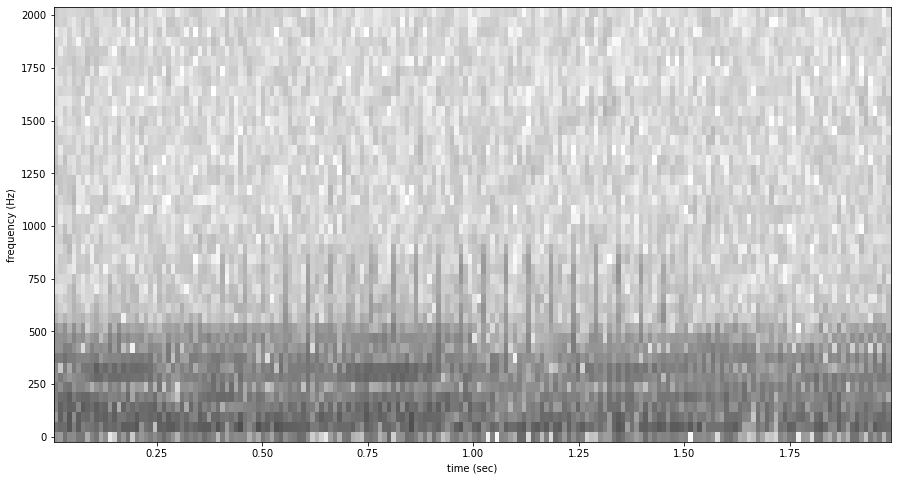

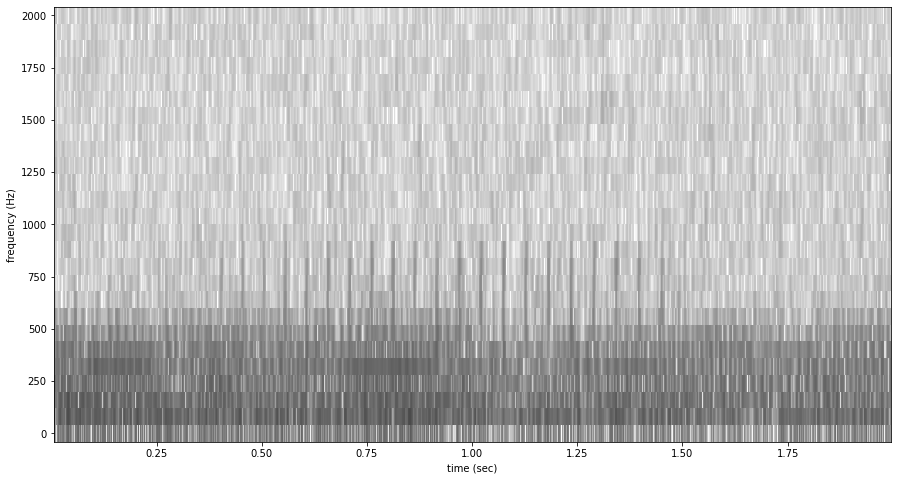

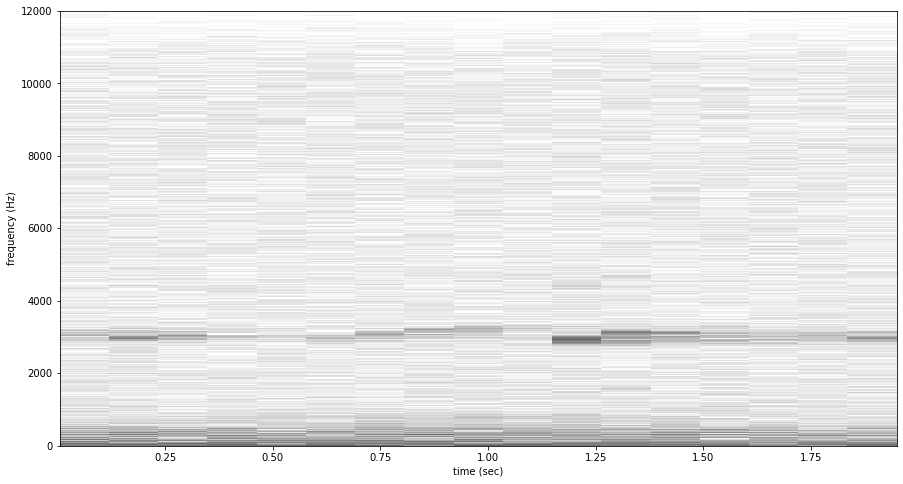

In [158]:
# testing different window_samples
audio_path = np.sort(glob('./test_gopher_audio/*'))[0]
audio = audio.from_file(audio_path).trim(53,55)

spec = Spectrogram.from_audio(audio).bandpass(0,2000) #, window_samples = 300
spec.plot()

spec_low_window = Spectrogram.from_audio(audio, window_samples = 300).bandpass(0,2000) #, window_samples = 300
spec_low_window.plot()

In [7]:
## Set parameters 

In [195]:
# minimum and maximum rate of pulsing (pulses per second) to search for
pulse_rate_range = [16,28]

# look for a vocalization in the range of 1000-2000 Hz
signal_band = [600,800]

# subtract the amplitude signal from these frequency ranges
# noise_bands = [ [0,200], [1500,2000]]

#divides the signal into segments this many seconds long, analyzes each independently
clip_duration = 0.5 #seconds
clip_overlap = 0 #seconds

#if True, it will show the power spectrum plot for each audio segment
show_plots = True

In [168]:
# test sample audios
audio_path = glob('./test_gopher_audio/gopher_sample.wav')[0]
print(audio_path)


#make the spectrogram
spec = Spectrogram.from_audio(audio.from_file(audio_path))#.trim(53,55))
#spec = Spectrogram.from_audio(audio.from_file(audio_path))

#run RIBBIT
score_df =  ribbit(
                    spec,
                    pulse_rate_range=pulse_rate_range,
                    signal_band=signal_band,
                    clip_duration=clip_duration,
                    #noise_bands=noise_bands,
                    plot=False)
print(max(score_df.score))

audio_path = glob('./test_gopher_audio/ornate_chorus_frog_sample.wav')[0]
print(audio_path)

#audio = audio.trim(51,55)

#make the spectrogram
spec = Spectrogram.from_audio(audio.from_file(audio_path))#.trim(53,55))
#spec = Spectrogram.from_audio(audio.from_file(audio_path))

#run RIBBIT
score_df =  ribbit(
                    spec,
                    pulse_rate_range=pulse_rate_range,
                    signal_band=signal_band,
                    clip_duration=clip_duration,
                    #noise_bands=noise_bands,
                    plot=False)
print(max(score_df.score))

    

./test_gopher_audio/gopher_sample.wav
0.02306825532406824
./test_gopher_audio/negative9.mp3


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 172, using nperseg = 172
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 173, using nperseg = 173
  .format(nperseg, input_length))


0.00043035281956098185


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))


./test_gopher_audio/400_20170304_223700_Lcapito.wav


/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 46, using nperseg = 46
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 47, using nperseg = 47
  .format(nperseg, input_length))


spectrogram


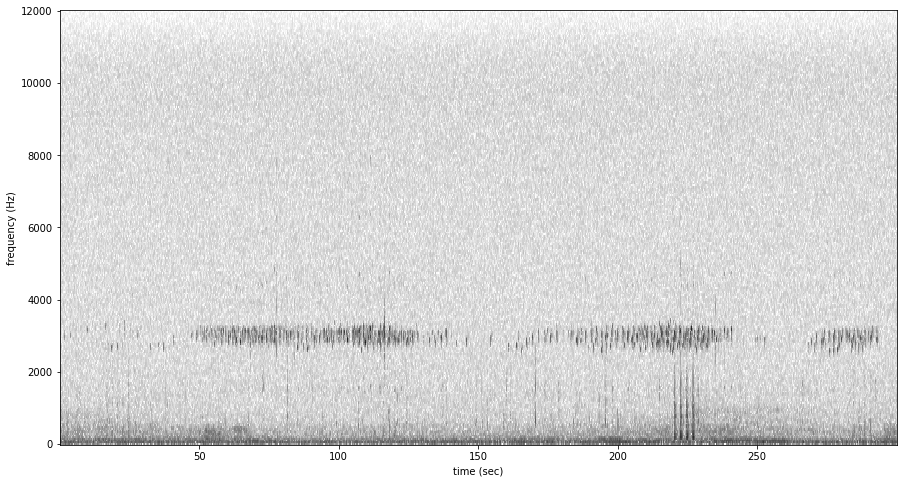

,start_time,end_time,score
352,176.0,176.5,4.11e-03
351,175.5,176.0,3.41e-03
302,151.0,151.5,3.34e-03
108,54.0,54.5,2.82e-03
338,169.0,169.5,2.74e-03
...,...,...,...
441,220.5,221.0,6.81e-05
136,68.0,68.5,6.78e-05
463,231.5,232.0,6.11e-05
183,91.5,92.0,5.32e-05


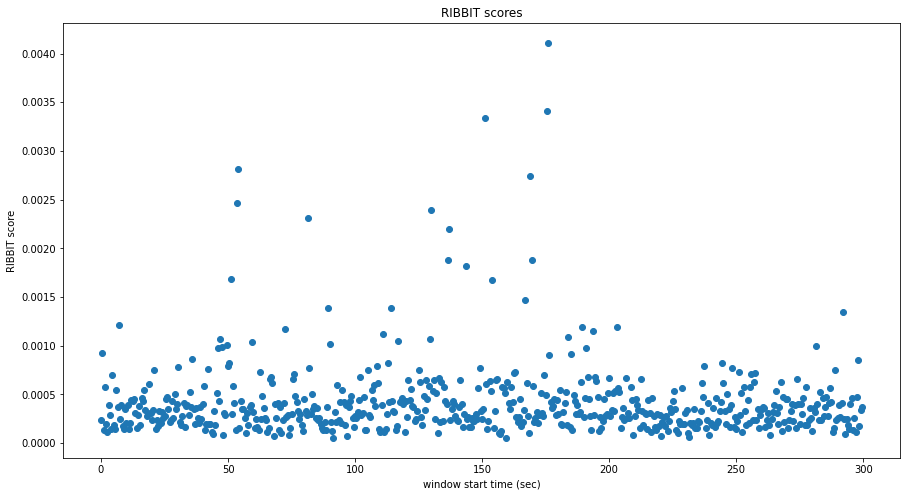

In [196]:
audio_path = np.sort(glob('./test_gopher_audio/400_20170304_223700_Lcapito.wav'))[0]
#audio_path = glob('./test_gopher_audio/gopher_sample.wav')[0]
#audio_path = glob('./test_gopher_audio/ornate_chorus_frog_sample.wav')[0]

print(audio_path)

#audio = audio.trim(51,55)

#make the spectrogram
spec = Spectrogram.from_audio(audio.from_file(audio_path))#.trim(53,55))
#spec = Spectrogram.from_audio(audio.from_file(audio_path))

#run RIBBIT
score_df =  ribbit(
                    spec,
                    pulse_rate_range=pulse_rate_range,
                    signal_band=signal_band,
                    clip_duration=clip_duration,
                    #noise_bands=noise_bands,
                    plot=False)
    
    
    
#show the spectrogram
print('spectrogram')
spec.plot()

# plot the score vs time of each window
plt.scatter(score_df['start_time'],score_df['score'])
plt.xlabel('window start time (sec)')
plt.ylabel('RIBBIT score')
plt.title('RIBBIT scores')

score_df.sort_values(by='score',ascending=False)    

In [197]:
score_df.sort_values(by='score',ascending=False).head(20)

,start_time,end_time,score
352,176.0,176.5,4.11e-03
351,175.5,176.0,3.41e-03
302,151.0,151.5,3.34e-03
108,54.0,54.5,2.82e-03
338,169.0,169.5,2.74e-03
107,53.5,54.0,2.47e-03
260,130.0,130.5,2.39e-03
163,81.5,82.0,2.31e-03
274,137.0,137.5,2.20e-03
273,136.5,137.0,1.88e-03


In [21]:
## analyzing set of files

In [175]:
# set up a dataframe for storing files' scores and labels
df = pd.DataFrame(index = glob('./test_gopher_audio/*'),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]

# calculate RIBBIT scores
for path in df.index:

    #make the spectrogram
    spec = Spectrogram.from_audio(audio.from_file(path))

    #run RIBBIT
    score_df =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        clip_duration=clip_duration,
                        #noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    df.at[path,'score'] = max(score_df.score) * 10000

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 94, using nperseg = 94
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/sci

Files sorted by score, from highest to lowest:


,score,label
./test_gopher_audio/gopher_sample.wav,230.68,0
./test_gopher_audio/400_20170303_193600_Lcapito.wav,119.95,1
./test_gopher_audio/400_20170305_223800_Lcapito.wav,96.95,1
./test_gopher_audio/FLSH-402_0+1_20170308_013900.wav,79.23,0
./test_gopher_audio/pops2.mp3,63.76,0
./test_gopher_audio/pops1.mp3,59.37,0
./test_gopher_audio/400_20170304_223700_Lcapito.wav,54.13,1
./test_gopher_audio/400_20170308_234000_Lcapito.wav,52.21,1
./test_gopher_audio/FLSH-402_0+1_20170308_214000.wav,34.5,0
./test_gopher_audio/399_20170304_193700_possLcapito.wav,28.67,1


In [181]:
# set up a dataframe for storing files' scores and labels
df = pd.DataFrame(index = glob('./test_gopher_audio/*'),columns=['score','label'])

# label is 1 if the file contains a Great Plains Toad vocalization, and 0 if it does not
df['label'] = [1 if 'Lcapito' in f else 0 for f in df.index]

noise_bands = [[0,10]]

# calculate RIBBIT scores
for path in df.index:

    #make the spectrogram
    spec = Spectrogram.from_audio(audio.from_file(path))

    #run RIBBIT
    score_df =  ribbit(
                        spec,
                        pulse_rate_range=pulse_rate_range,
                        signal_band=signal_band,
                        clip_duration=clip_duration,
                        noise_bands=noise_bands,
                        plot=False)

    # use the maximum RIBBIT score from any window as the score for this file
    # multiply the score by 10,000 to make it easier to read
    df.at[path,'score'] = max(score_df.score) * 10000

print("Files sorted by score, from highest to lowest:")
df.sort_values(by='score',ascending=False)

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages

/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 93, using nperseg = 93
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 94, using nperseg = 94
  .format(nperseg, input_length))
/Users/mayalapp/opt/anaconda3/envs/opensoundscape060/lib/python3.7/site-packages/sci

Files sorted by score, from highest to lowest:


,score,label
./test_gopher_audio/FLSH-402_0+1_20170308_184000.wav,3236.96,0
./test_gopher_audio/gopher_sample.wav,3121.07,0
./test_gopher_audio/FLSH-402_0+1_20170308_194000.wav,2983.75,0
./test_gopher_audio/FLSH-402_0+1_20170308_023900.wav,2683.4,0
./test_gopher_audio/FLSH-402_0+1_20170308_214000.wav,2141.58,0
./test_gopher_audio/FLSH-402_0+1_20170308_013900.wav,2084.94,0
./test_gopher_audio/FLSH-402_0+1_20170308_003900.wav,2012.3,0
./test_gopher_audio/FLSH-402_0+1_20170308_204000.wav,1989.94,0
./test_gopher_audio/400_20170303_193600_Lcapito.wav,1942.37,1
./test_gopher_audio/FLSH-402_0+1_20170307_233900.wav,1744.89,0
